## Business Goal:

Required to model the demand for shared bikes with the available independent variables. 



In [2]:
## Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

In [3]:
## suppress scientific notation of values 
pd.options.display.float_format = '{:.2f}'.format
## increasing the number of rows and columns displayed with pandas
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',100)

# Step1: Reading and Understanding the Data

In [4]:
## import the dataset
bike_sharing = pd.read_csv("day.csv")

In [5]:
## display the first 5 rows of dataframe
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [6]:
## dimension of dataframe
bike_sharing.shape

(730, 16)

In [7]:
## view the summary of the dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
## view the statistics summary of numeric columns
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [9]:
## check for the null values in columns
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
## renaming the few columns for better readability
bike_sharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)

In [11]:
## check the colnames of dataset after renaming the columns
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
## view the dataset
bike_sharing.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


#### drop the unwanted columns
* dropping instant column as it is index column nothing to do with target variable
* dropping dteday as we have already have month and weekday columns
* dropping casual and registered columns as we have cnt column which is a combination of both as target variable



In [13]:
## dropping the columns
bike_sharing.drop(['instant','dteday','casual','registered'],axis=1.,inplace=True)

In [14]:
## check the dimension 
bike_sharing.shape

(730, 12)

## Convert the numeric variable to categorical variables
 * here season,weekday and weathersit are the categorical columns.
 
 #### Lets the convert these variables into numeric

In [15]:
## mapping the categorical columns
bike_sharing.season = bike_sharing.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_sharing.weekday = bike_sharing.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Misty or Cloudy',3:'Light_snowrain',4:'Heavy_snowrain'})

In [16]:
## view the dataset
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,Saturday,0,Misty or Cloudy,14.11,18.18,80.58,10.75,985
1,spring,0,1,0,Sunday,0,Misty or Cloudy,14.90,17.69,69.61,16.65,801
2,spring,0,1,0,Monday,1,Clear,8.05,9.47,43.73,16.64,1349
3,spring,0,1,0,Tuesday,1,Clear,8.20,10.61,59.04,10.74,1562
4,spring,0,1,0,Wednesday,1,Clear,9.31,11.46,43.70,12.52,1600


In [17]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [18]:
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,Saturday,0,Misty or Cloudy,14.11,18.18,80.58,10.75,985
1,spring,0,1,0,Sunday,0,Misty or Cloudy,14.90,17.69,69.61,16.65,801
2,spring,0,1,0,Monday,1,Clear,8.05,9.47,43.73,16.64,1349
3,spring,0,1,0,Tuesday,1,Clear,8.20,10.61,59.04,10.74,1562
4,spring,0,1,0,Wednesday,1,Clear,9.31,11.46,43.70,12.52,1600


## Step 2: Visualizing the Data

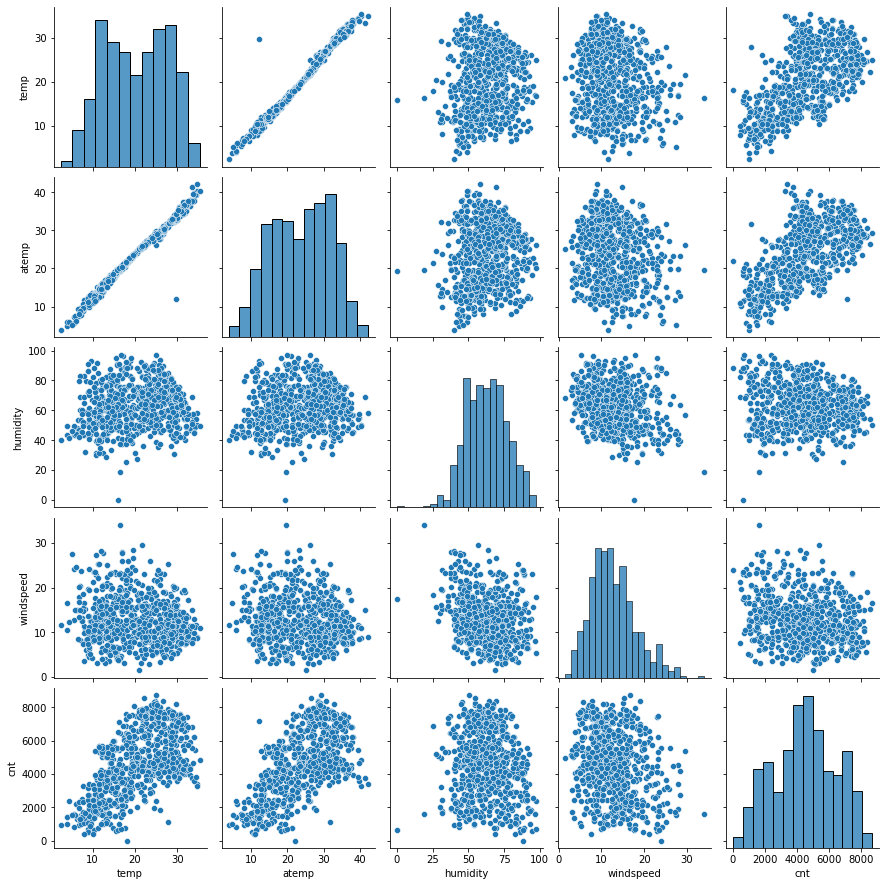

In [19]:
## check correlation for numeric variables
sns.pairplot(bike_sharing,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

### observations
  * temp and atemp variables are highly correlated with each other
  * there is a relationship between temp,atemp,windspeed and humidity variables with target variable cnt.

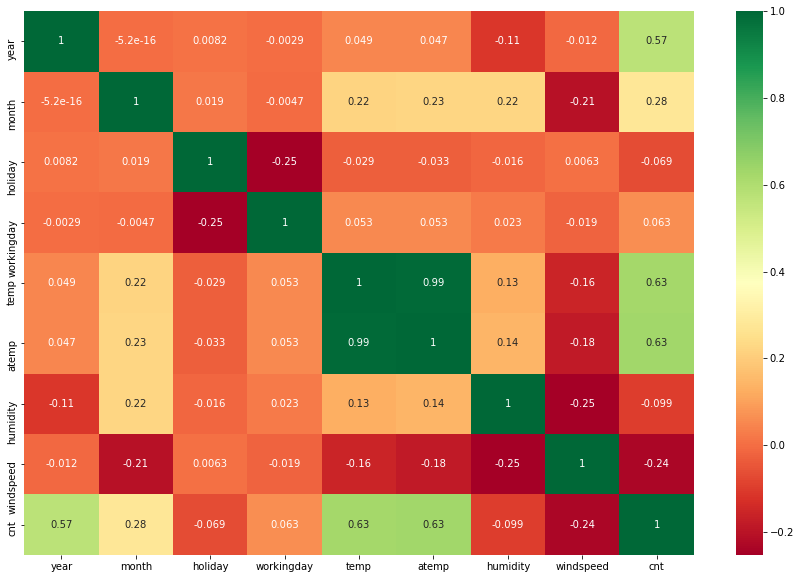

In [20]:
### correlation to check avaoid multicollearnity
plt.figure(figsize = (15,10))
sns.heatmap(bike_sharing.corr(), annot = True,cmap = "RdYlGn")
plt.show()

## Observations
  * temp and atemp are highly positively correlated with a value of 0.99
  * need to drop both the variables due to multicollearnity
  
  Lets perform VIF and P-value to decide which parameters to keep

In [21]:
### Calculate the VIF to find which variable to drop

## take numerical variables
vars = bike_sharing[['temp','atemp','humidity','windspeed','cnt']]

X = add_constant(vars)
v = pd.Series([variance_inflation_factor(X.values,i)
              for i in range(X.shape[1])],
             index=X.columns)
v.sort_values(ascending = False)

atemp       63.94
temp        62.99
const       52.98
cnt          1.86
windspeed    1.19
humidity     1.18
dtype: float64

### Observations:
     * atemp has a higher VIF,drop the column to avoid multicollearnity 

In [22]:
## dropping the atemp column
bike_sharing.drop(['atemp'],axis = 1,inplace = True)

In [23]:
## check the shape
bike_sharing.shape

(730, 11)

In [24]:
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,1,0,Saturday,0,Misty or Cloudy,14.11,80.58,10.75,985
1,spring,0,1,0,Sunday,0,Misty or Cloudy,14.90,69.61,16.65,801
2,spring,0,1,0,Monday,1,Clear,8.05,43.73,16.64,1349
3,spring,0,1,0,Tuesday,1,Clear,8.20,59.04,10.74,1562
4,spring,0,1,0,Wednesday,1,Clear,9.31,43.70,12.52,1600


## Visualize the categorical variables with target cnt varaible using boxplot

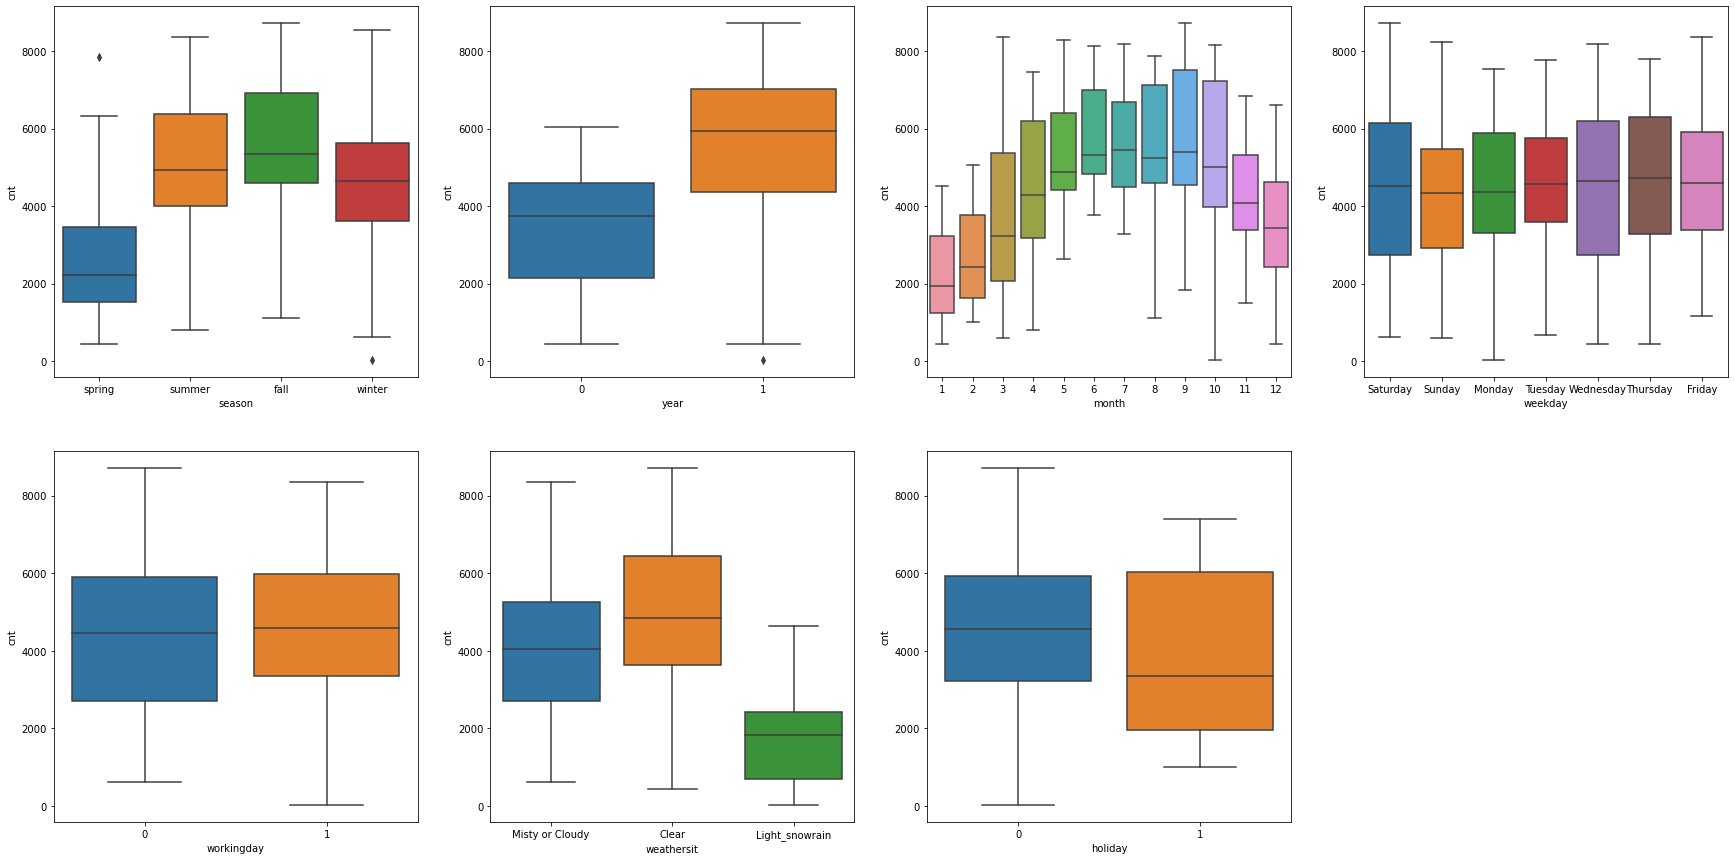

In [25]:
plt.figure(figsize = (30,15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt',data = bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt',data = bike_sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt',data = bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt',data = bike_sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt',data = bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt',data = bike_sharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'holiday', y = 'cnt',data = bike_sharing)

plt.show()




### observations:

       -- Bike Ride count maximum in fall season.
       -- Ride count is highest in the year 2019 as compared to 2018
       -- Ride count is highest in middle of the year than first and last months of the year
       -- Ride count is not much difference in the weekdays
       -- Ride count is lesser on holidays than other days
       -- Ride count is higher in clear weathersit than Light_snowrain

  
         
  

In [26]:
## function to create a barplot for categorical variables
def bar_cat_plot(var):
    plt.figure(figsize=(10,6))
    plt.title('Average Ride Count vs '+str(var))
    ax = sns.barplot(x = var,y='cnt',data=bike_sharing,)
    ax.bar_label(ax.containers[0],label_type='center')
    plt.show()
    
# cat_var = ['season','year','month','workingday','weekday','weathersit','holiday']

# for i in cat_var:
#     bar_cat_plot(var=i)
    
# print("-------------------------------------------------------------------------")


    

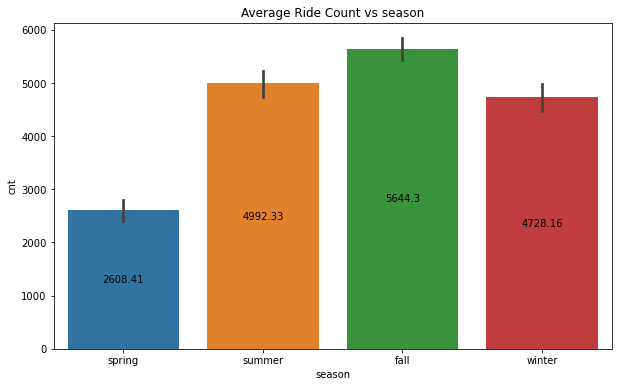

In [27]:
bar_cat_plot(var = 'season')

#### observations:
* highest ride count in summer season
* less ride count in spring season

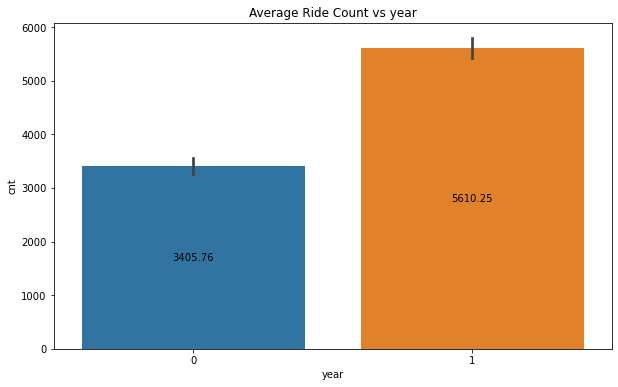

In [28]:
bar_cat_plot(var = 'year')

#### observations:
* highest Ride Count in the year 2019 than 2018


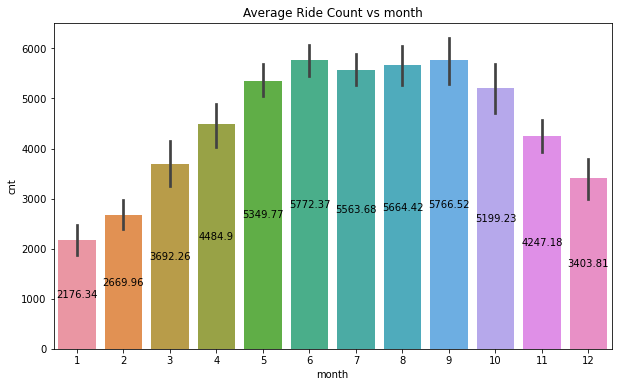

In [29]:
bar_cat_plot(var = 'month')

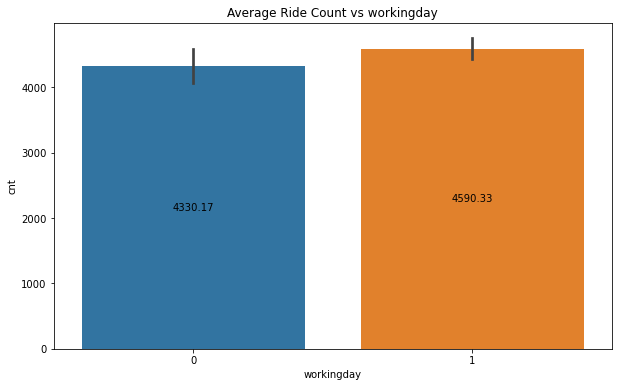

In [30]:
bar_cat_plot(var = 'workingday')

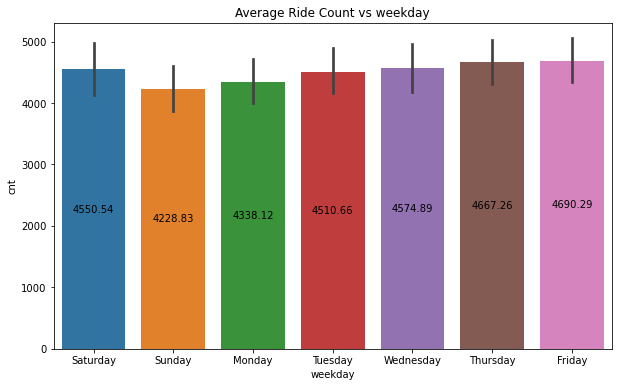

In [31]:
bar_cat_plot(var = 'weekday')

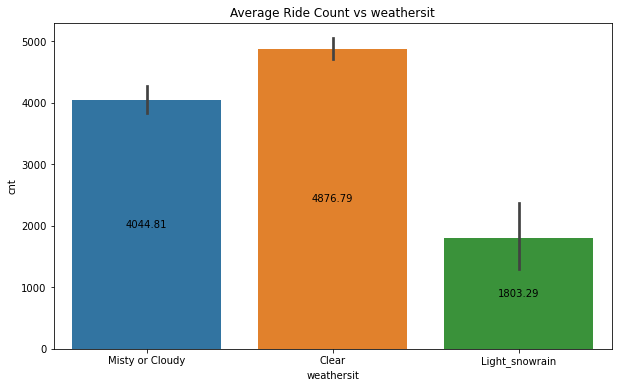

In [32]:
bar_cat_plot(var = 'weathersit')

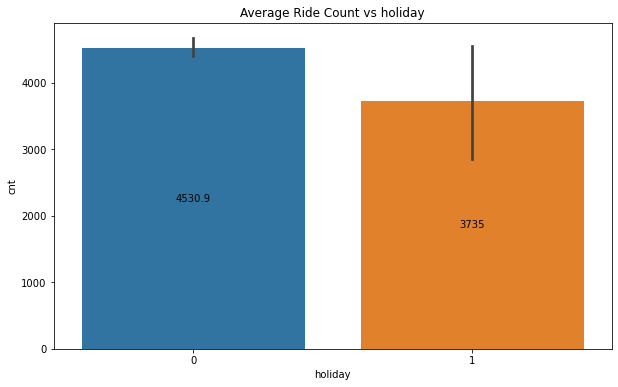

In [33]:
bar_cat_plot(var = 'holiday')

## Data Preparation

In [34]:
## Create Dummy Variables for few categorical variables

Season = pd.get_dummies(bike_sharing['season'],drop_first = True)
Weather = pd.get_dummies(bike_sharing['weathersit'],drop_first = True)
WeekDay = pd.get_dummies(bike_sharing['weekday'],drop_first = True)
Month = pd.get_dummies(bike_sharing['month'],drop_first = True)


In [35]:
bike_sharing = pd.concat([bike_sharing,Season,Weather,WeekDay,Month],axis = 1)

In [36]:
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt,spring,summer,winter,Light_snowrain,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Saturday,0,Misty or Cloudy,14.11,80.58,10.75,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Sunday,0,Misty or Cloudy,14.90,69.61,16.65,801,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Monday,1,Clear,8.05,43.73,16.64,1349,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear,8.20,59.04,10.74,1562,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Wednesday,1,Clear,9.31,43.70,12.52,1600,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [37]:
## Drop the original season,month,weathersit and weekday columns
bike_sharing.drop(['season','month','weathersit','weekday'],axis = 1,inplace = True)

## Step 4: Splitting the Data into Training and Test Data

In [38]:
## Splitting the data to train and test sets
train, test = train_test_split(bike_sharing, train_size = 0.7 , test_size = 0.3 , random_state = 100)

In [39]:
train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light_snowrain,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.20,55.83,12.21,7534,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.25,70.42,11.08,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.98,62.12,10.79,4066,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.49,48.33,23.50,1796,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.44,48.96,8.71,4220,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
print(train.shape)
print(test.shape)

(510, 29)
(219, 29)


In [41]:
test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light_snowrain,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.79,63.79,5.46,6043,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.08,59.21,7.63,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.27,81.29,13.25,2659,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.43,42.42,13.42,4780,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.32,30.50,19.58,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
bike_sharing.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light_snowrain,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.50,0.03,0.68,20.32,62.77,12.76,4508.01,0.25,0.25,0.24,0.03,0.34,0.14,0.14,0.14,0.14,0.14,0.14,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
std,0.50,0.17,0.47,7.51,14.24,5.20,1936.01,0.43,0.43,0.43,0.17,0.47,0.35,0.35,0.35,0.35,0.35,0.35,0.27,0.28,0.27,0.28,0.27,0.28,0.28,0.27,0.28,0.27,0.28
min,0.00,0.00,0.00,2.42,0.00,1.50,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,13.81,52.00,9.04,3169.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.50,0.00,1.00,20.47,62.62,12.13,4548.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,26.88,72.99,15.63,5966.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,35.33,97.25,34.00,8714.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [43]:
## scaling numeric data using MinMax scalar
scaler = MinMaxScaler()
numeric_vars = ['temp','humidity','windspeed','cnt']
train[numeric_vars] = scaler.fit_transform(train[numeric_vars])
train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light_snowrain,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.51,0.58,0.30,0.86,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.82,0.73,0.26,0.83,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.44,0.64,0.26,0.47,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.25,0.50,0.66,0.20,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.40,0.50,0.19,0.48,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [44]:
## split the train data into independent variables and dependent varaible
y_train =  train.pop('cnt')
x_train = train

In [45]:
x_train.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light_snowrain,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.51,0.58,0.30,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.82,0.73,0.26,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.44,0.64,0.26,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.25,0.50,0.66,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.40,0.50,0.19,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
y_train.head()

653   0.86
576   0.83
426   0.47
728   0.20
482   0.48
Name: cnt, dtype: float64

## Step 5: Building linear model

In [47]:
## Fitting the linear Regression on train dataset
lm = LinearRegression()
lm.fit(x_train,y_train)

## Select the features using RFE
rfe = RFE(lm)
rfe = rfe.fit(x_train,y_train)

In [48]:
## display the influence of independent variables using rfe ranking
rfe_df = pd.DataFrame({'Predictor':x_train.columns,'Select Status':rfe.support_,'Ranking': rfe.ranking_})
rfe_df.sort_values(by = 'Ranking')

,Predictor,Select Status,Ranking
0,year,True,1
19,4,True,1
18,3,True,1
24,9,True,1
20,5,True,1
9,Light_snowrain,True,1
8,winter,True,1
10,Misty or Cloudy,True,1
6,spring,True,1
5,windspeed,True,1


In [49]:
## selecting the independent variables from the rfe ranking list
select_var = x_train.columns[rfe.support_]
select_var

Index([           'year',         'holiday',            'temp',
              'humidity',       'windspeed',          'spring',
                'winter',  'Light_snowrain', 'Misty or Cloudy',
                       3,                 4,                 5,
                       6,                 9],
      dtype='object')

In [50]:
## Assigning the selected varaibles to x_train data to build a model
x_train_rfe = x_train[select_var]

## Function to build a mode using statsmodel api
def model_build(vars):
    X_train_sm = sm.add_constant(x_train_rfe[vars])
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIF
def calc_vif(vars):
    df1 = x_train_rfe[vars]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF",ascending = False)
    headers = ['Features','VIF']
    print(tabulate(round(vif,2),headers,tablefmt = "fancy_grid"))
    vif



In [51]:
## build a model with the variables selected by RFE
vars = x_train_rfe.columns
model_build(vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          3.52e-187
Time:                        16:12:20   Log-Likelihood:                 507.16
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     495   BIC:                            -920.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2977      0.034     

## Dropping the Variable and Updating the Model


In [52]:
## Dropping the "6" which has highest p-value 0.070 and update the model
x_train_rfe = x_train_rfe.drop(6,axis=1)
vars = x_train_rfe.columns
model_build(vars)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          1.25e-187
Time:                        16:12:22   Log-Likelihood:                 505.47
No. Observations:                 510   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -923.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3065      0.033     

## Calculating the VIF 

Variance Inflation factor or VIF is basic quantative idea about how much feature variables are correlated with each other.Lets calculate the VIF

In [53]:
vars = x_train_rfe.columns
calc_vif(vars)

╒════╤═════════════════╤═══════╕
│    │ Features        │   VIF │
╞════╪═════════════════╪═══════╡
│  3 │ humidity        │ 25.45 │
├────┼─────────────────┼───────┤
│  2 │ temp            │ 14.46 │
├────┼─────────────────┼───────┤
│  4 │ windspeed       │  4.65 │
├────┼─────────────────┼───────┤
│  5 │ spring          │  3.35 │
├────┼─────────────────┼───────┤
│  6 │ winter          │  2.74 │
├────┼─────────────────┼───────┤
│  8 │ Misty or Cloudy │  2.26 │
├────┼─────────────────┼───────┤
│  0 │ year            │  2.09 │
├────┼─────────────────┼───────┤
│ 10 │ 4               │  1.46 │
├────┼─────────────────┼───────┤
│ 11 │ 5               │  1.39 │
├────┼─────────────────┼───────┤
│  9 │ 3               │  1.28 │
├────┼─────────────────┼───────┤
│  7 │ Light_snowrain  │  1.22 │
├────┼─────────────────┼───────┤
│ 12 │ 9               │  1.22 │
├────┼─────────────────┼───────┤
│  1 │ holiday         │  1.05 │
╘════╧═════════════════╧═══════╛


humidity variable has highest VIF 25.45 lets drop and update model

## Dropping the variable and updating the model

In [54]:
## humidity has highest VF ,dropping it 
x_train_rfe = x_train_rfe.drop('humidity',axis = 1)
vars = x_train_rfe.columns
model_build(vars)

calc_vif(vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          4.89e-185
Time:                        16:12:25   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2218      0.027     

## Step 6: Residual analysis of the data

In [55]:
## building a model
def feature_model_build(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [56]:
vars = x_train_rfe.columns
lr = feature_model_build(x_train_rfe[vars],y_train)
y_train_pred = lr.predict(x_train_rfe[vars])

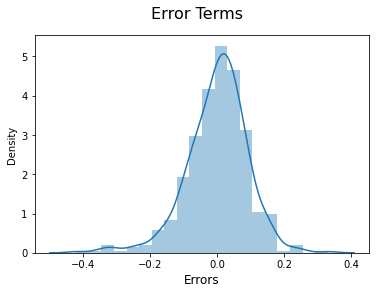

In [57]:
error = y_train - y_train_pred 
## plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error,bins = 20)
fig.suptitle('Error Terms',fontsize =16)
plt.xlabel('Errors',fontsize = 12)
plt.show()

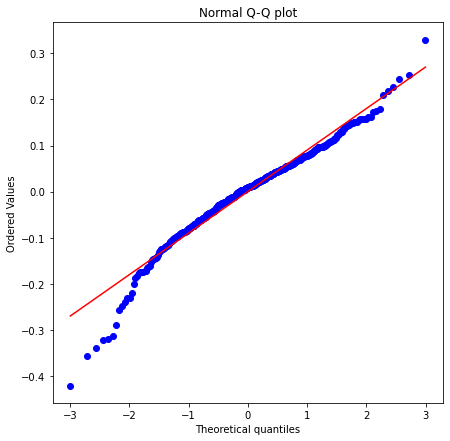

In [58]:
## Plotting Q-Q plot to confirm normal distribution of errors
plt.figure(figsize=(7,7))
stats.probplot(error,dist = "norm",plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


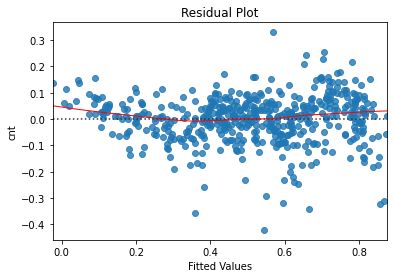

In [59]:
## plot the scatterplot for the error terms
fig = plt.figure()
sns.residplot(y_train_pred,y_train,lowess=True,line_kws={'color':'red','lw':1,'alpha':1})
plt.xlabel("Fitted Values")
plt.title('Residual Plot')
plt.show()

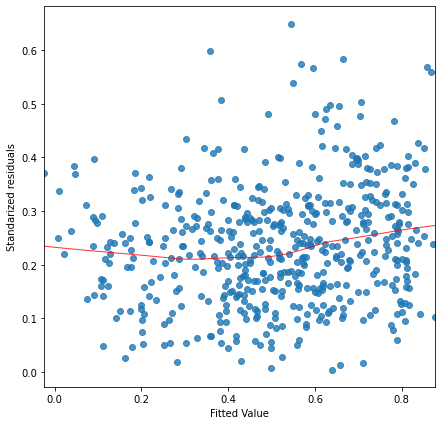

In [60]:
## plotting scale-location plot to verify the homoscedasticity of residuals
normal_residuals_abs_sqrt = np.sqrt(np.abs(error))

plt.figure(figsize = (7,7))
sns.regplot(y_train_pred,normal_residuals_abs_sqrt,
           scatter = True,
           lowess =True,
           line_kws = {'color':'red','lw':1,'alpha': 0.8} )
plt.ylabel("Standarized residuals")
plt.xlabel('Fitted Value')
plt.show()

In [61]:
## calculating the meanpf residuals
round((y_train-y_train_pred).mean(),2)


0.0

## Step 7: Making the Predictions Using Model

In [62]:
## Apply scale on test sets
numeric_vars = ['temp','humidity','windspeed','cnt']
test[numeric_vars] = scaler.transform(test[numeric_vars])

In [63]:
## remove the target variable
y_test = test.pop('cnt')
x_test = test

In [64]:
## removing x_train_rfe columns and creating new dataframe for x_test
vars = x_train_rfe.columns
X_test = x_test[x_train_rfe.columns]

## Adding a constant variable
X_test = sm.add_constant(X_test)

In [65]:
## Making predictions
vars = x_train_rfe.columns
y_pred = lr.predict(X_test[vars])

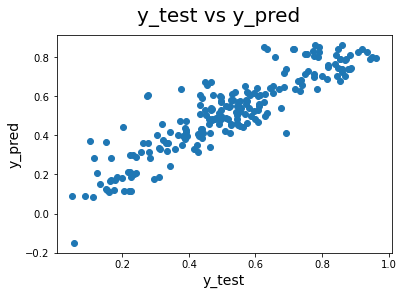

In [66]:
## plt y_test against y_pred to understand the spread of data
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize = 20)
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.show()

In [67]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_pred)
print("Rsquared value of train data: ", r2_train)
print("Rsquared value of test data:",r2_test)

Rsquared value of train data:  0.8340601645048038
Rsquared value of test data: 0.8073113447598944


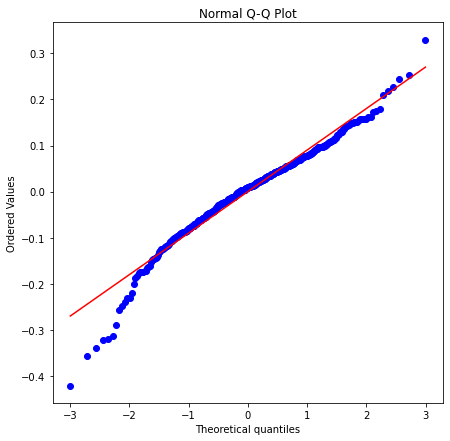

In [68]:
## Plotting Q-Q plot to check normal distribution of errors
plt.figure(figsize = (7,7))
stats.probplot(error,dist = "norm",plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [69]:
adj_r2_train = 1-(1-r2_train)*(510-1)/(510-11-1)
adj_r2_test = 1-(1-r2_test)*(219-1)/(219-11-1)
print("Adjusted RSquared value of train-data:", adj_r2_train)
print("Adjusted RSquared value of test-data:", adj_r2_test)

Adjusted RSquared value of train-data: 0.8303948267729822
Adjusted RSquared value of test-data: 0.7970718510031738


In [70]:
## calculate the mean squared error of train and test data
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_pred)
print("MSE Train:", mse_train)
print("MSE Test:", mse_test)

MSE Train: 0.008353896389753443
MSE Test: 0.009151903402020148


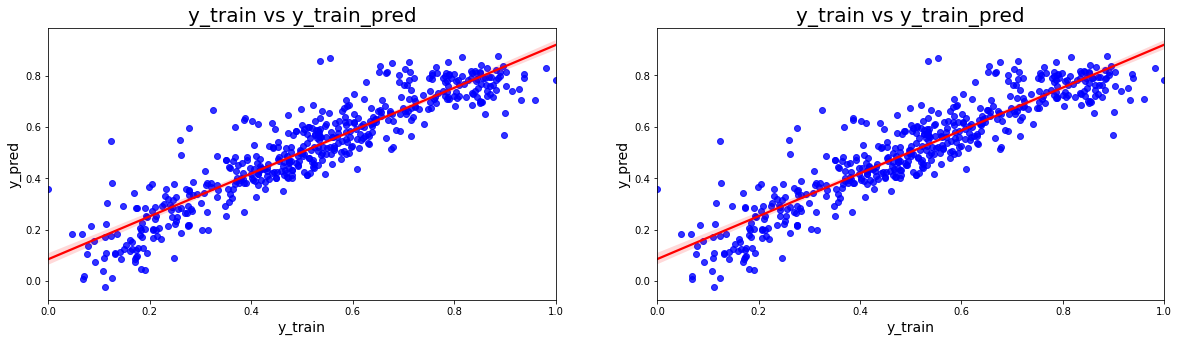

In [71]:
## check linearship of y_test and y_train with their predicted values
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.regplot(y_train,y_train_pred,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('y_train vs y_train_pred', fontsize = 20)
plt.xlabel('y_train', fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)

plt.subplot(1,2,2)
sns.regplot(y_train,y_train_pred,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('y_train vs y_train_pred', fontsize = 20)
plt.xlabel('y_train', fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)

plt.show()




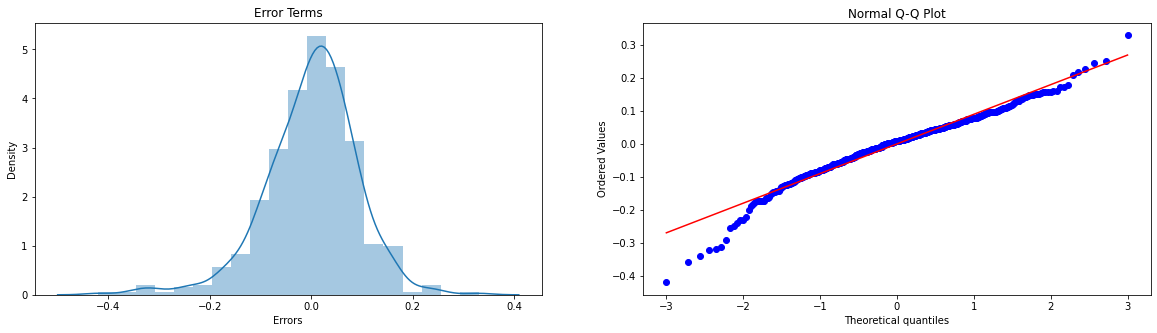

In [72]:
## check the errors are normally distributed
error = y_train - y_train_pred
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(error , bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')


plt.subplot(1,2,2)
stats.probplot(error , dist = "norm" , plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

In [73]:
## check for the overfitting/underfitting

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
print("Rsquared value of train data: ",r2_train)
print("Rsquared value of test data:",r2_test)


Rsquared value of train data:  0.8340601645048038
Rsquared value of test data: 0.8073113447598944


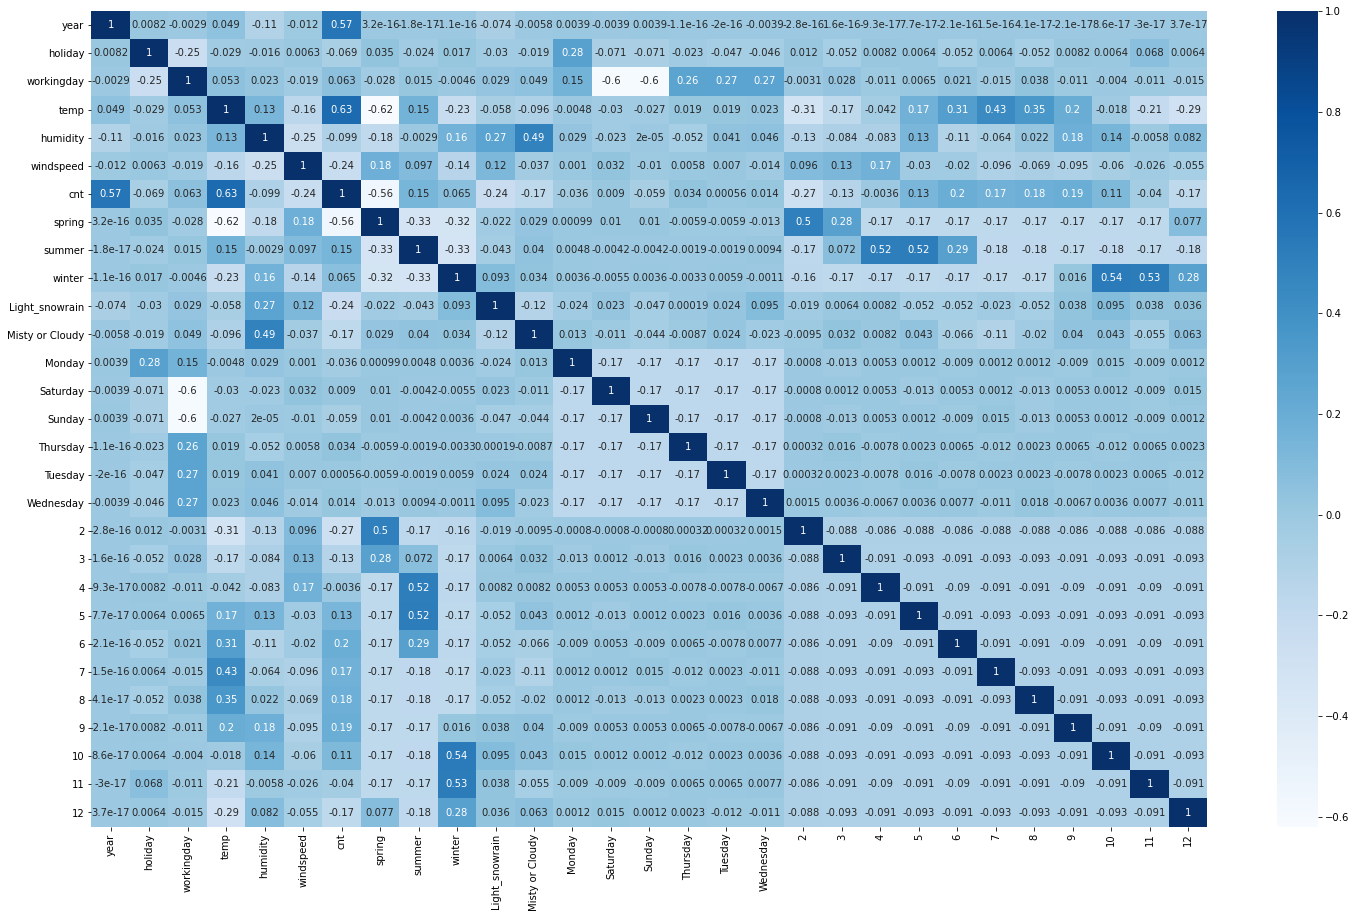

╒════╤═════════════════╤═══════╕
│    │ Features        │   VIF │
╞════╪═════════════════╪═══════╡
│  3 │ windspeed       │  4.64 │
├────┼─────────────────┼───────┤
│  2 │ temp            │  3.93 │
├────┼─────────────────┼───────┤
│  0 │ year            │  2.08 │
├────┼─────────────────┼───────┤
│  4 │ spring          │  1.95 │
├────┼─────────────────┼───────┤
│  5 │ winter          │  1.55 │
├────┼─────────────────┼───────┤
│  7 │ Misty or Cloudy │  1.53 │
├────┼─────────────────┼───────┤
│  9 │ 4               │  1.33 │
├────┼─────────────────┼───────┤
│  8 │ 3               │  1.28 │
├────┼─────────────────┼───────┤
│ 10 │ 5               │  1.25 │
├────┼─────────────────┼───────┤
│ 11 │ 9               │  1.2  │
├────┼─────────────────┼───────┤
│  6 │ Light_snowrain  │  1.08 │
├────┼─────────────────┼───────┤
│  1 │ holiday         │  1.05 │
╘════╧═════════════════╧═══════╛


In [74]:
## there is no multicollinearnity between independent variables
plt.figure(figsize = (25,15))
sns.heatmap(bike_sharing.corr(),annot = True, cmap='Blues')
plt.show()
vars = x_train_rfe.columns
calc_vif(vars)

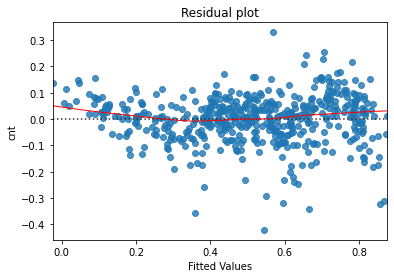

In [75]:
## 5.Homoscedasticity of Residuals
fig = plt.figure()
sns.residplot(y_train_pred,y_train,lowess = True,line_kws = {'color':'red','lw': 1 ,'alpha': 1})
plt.xlabel("Fitted Values")
plt.title('Residual plot')
plt.show()


In [76]:
## There are atleast of 20 records of independent varaibles
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   humidity         730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    uint8  
 8   summer           730 non-null    uint8  
 9   winter           730 non-null    uint8  
 10  Light_snowrain   730 non-null    uint8  
 11  Misty or Cloudy  730 non-null    uint8  
 12  Monday           730 non-null    uint8  
 13  Saturday         730 non-null    uint8  
 14  Sunday           730 non-null    uint8  
 15  Thursday         730 non-null    uint8  
 16  Tuesday          730 non-null    uint8  
 17  Wednesday       

In [77]:
## all categorical variables converted into numeric variables
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   humidity         510 non-null    float64
 5   windspeed        510 non-null    float64
 6   spring           510 non-null    uint8  
 7   summer           510 non-null    uint8  
 8   winter           510 non-null    uint8  
 9   Light_snowrain   510 non-null    uint8  
 10  Misty or Cloudy  510 non-null    uint8  
 11  Monday           510 non-null    uint8  
 12  Saturday         510 non-null    uint8  
 13  Sunday           510 non-null    uint8  
 14  Thursday         510 non-null    uint8  
 15  Tuesday          510 non-null    uint8  
 16  Wednesday        510 non-null    uint8  
 17  2              

In [78]:
## the final model

vars = x_train_rfe.columns
lm = model_build(vars)
calc_vif(vars)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          4.89e-185
Time:                        16:12:41   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2218      0.027     

- Demand of bikes depend on year,temperature,winter, and months as March,April,May and september
- wind speed,spring,light_snowrain,Misty or cloudy atmosphere have negative impact on count of bike rentals


## Comparison between Training and Testing Dataset:

- Rsquared value of train data:  0.8340601645048038
- Rsquared value of test data: 0.8073113447598944
- Adjusted RSquared value of train-data: 0.8303948267729822
- Adjusted RSquared value of test-data: 0.7970718510031738
    
The model has good R^2 score of 0.807(80.7%) on the test data
